In [1]:
import numpy as np
from PIL import Image

In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

## Model (VGG16-pretrained model having 138+ million paramters)

In [4]:
model = VGG16(weights = "imagenet", include_top = "True")

In [5]:
## creating a dictionary from for loop
layers = dict([(layer.name,layer.output) for layer in model.layers])

In [6]:
# all the layers of our model
layers

{'input_1': <tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>,
 'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tenso

In [7]:
# number of parameters
model.count_params()

138357544

## Processing the image

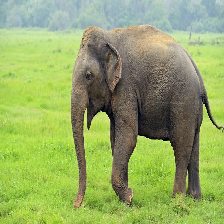

In [8]:
image_path = "elephant.jpg"
image = Image.open(image_path)
image = image.resize((224,224))
image

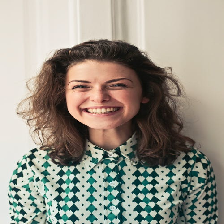

In [9]:
image_path1 = "Human.jpeg"
image1 = Image.open(image_path1)
image1 = image1.resize((224,224))
image1

In [10]:
# converting both images into an array
x1 = np.asarray(image)
x2 = np.asarray(image1)
x1.shape

(224, 224, 3)

In [11]:
# converting them into a list of arrays
x1 = np.expand_dims(x1, axis=0) # axis=0 means along the columns
x2 = np.expand_dims(x2, axis=0)
x1.shape

(1, 224, 224, 3)

In [12]:
# preprocessing the input to match the training data
x1 = preprocess_input(x1)
x2 = preprocess_input(x2)
x1

array([[[[ 7.0060997e+01,  6.0221001e+01,  2.1320000e+01],
         [ 7.1060997e+01,  4.6221001e+01,  1.1320000e+01],
         [ 7.3060997e+01,  4.5221001e+01,  1.2320000e+01],
         ...,
         [ 9.6060997e+01,  7.9221001e+01,  5.3320000e+01],
         [ 9.8060997e+01,  8.1221001e+01,  5.5320000e+01],
         [ 9.7060997e+01,  8.1221001e+01,  5.3320000e+01]],

        [[ 7.0060997e+01,  6.0221001e+01,  2.1320000e+01],
         [ 7.7060997e+01,  5.2221001e+01,  1.7320000e+01],
         [ 7.6060997e+01,  4.8221001e+01,  1.5320000e+01],
         ...,
         [ 9.7060997e+01,  8.2221001e+01,  5.7320000e+01],
         [ 9.7060997e+01,  8.2221001e+01,  5.7320000e+01],
         [ 9.3060997e+01,  7.7221001e+01,  4.9320000e+01]],

        [[ 7.1060997e+01,  5.9221001e+01,  2.0320000e+01],
         [ 8.3060997e+01,  5.9221001e+01,  2.4320000e+01],
         [ 7.5060997e+01,  4.9221001e+01,  1.6320000e+01],
         ...,
         [ 9.8060997e+01,  8.5221001e+01,  6.2320000e+01],
         [

## Classifying the image

In [13]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.keras.backend.set_session(tf.Session(config=config))

In [15]:
preds1 = model.predict(x1)
preds2 = model.predict(x2)

In [21]:
decode_predictions(preds1)

[[('n01871265', 'tusker', 0.5159624),
  ('n02504013', 'Indian_elephant', 0.45550638),
  ('n02504458', 'African_elephant', 0.028527962),
  ('n01704323', 'triceratops', 1.2121584e-06),
  ('n02410509', 'bison', 9.836524e-07)]]

In [23]:
decode_predictions(preds2)

[[('n03980874', 'poncho', 0.89203405),
  ('n02963159', 'cardigan', 0.052957192),
  ('n02834397', 'bib', 0.024262965),
  ('n03877472', 'pajama', 0.005511008),
  ('n04599235', 'wool', 0.004300988)]]

In [24]:
print("Prediction: ", decode_predictions(preds1,top=1)[0])
print("Prediction: ", decode_predictions(preds2,top=1)[0])

# in case of human the vgg16 model predicted the clothing item-> poncho top

Prediction:  [('n01871265', 'tusker', 0.5159624)]
Prediction:  [('n03980874', 'poncho', 0.89203405)]
